In [58]:
# Create Latitude and Longitude Combinations
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import gmaps


# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key
from config import g_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [4]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [5]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs # When we run this cell, the output is a zip object in memory. The zip object packs each pair of lats and lngs having the same index in their respective array into a tuple.

In [6]:
# Add the latitudes and longitudes to a list. Here we unzip thw zip from above!
coordinates = list(lat_lngs)

In [7]:
from citipy import citipy

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

621

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1 #броим позицията на записа! всеки сет започва от 1, затова при нов сет залагама 1 като начало тук;
        
    # Create endpoint URL with each city.
    # city_url = url + "&q=" + cities[i] --> wanting to check if this really gives an error!!! <---
    
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+") #когато градът се състои от 2 думи (има празно място м/у думите), кодът ще върне само първата дума. Затова е нужно replace ...

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass #continue can be used as well!

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
    

Processing Record 1 of Set 1 | cherskiy
Processing Record 2 of Set 1 | puerto escondido
Processing Record 3 of Set 1 | rio grande
Processing Record 4 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 5 of Set 1 | bima
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | harper
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | verkhoyansk
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | atuona
Processing Record 13 of Set 1 | jamestown
Processing Record 14 of Set 1 | gushikawa
Processing Record 15 of Set 1 | kyra
Processing Record 16 of Set 1 | ilheus
Processing Record 17 of Set 1 | barbar
City not found. Skipping...
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | port blair
Processing Record 20 of Set 1 | tuktoyaktuk
Processing Record 21 of Set 1 | busselton
Processing Record 22 of Set 1 | kapaa
Processing Record 23 of Set 1 | sentyabrskiy
Ci

Processing Record 37 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 38 of Set 4 | new norfolk
Processing Record 39 of Set 4 | saint-philippe
Processing Record 40 of Set 4 | parrita
Processing Record 41 of Set 4 | sayyan
Processing Record 42 of Set 4 | bulaevo
Processing Record 43 of Set 4 | kahului
Processing Record 44 of Set 4 | kavieng
Processing Record 45 of Set 4 | rincon
Processing Record 46 of Set 4 | kachiry
Processing Record 47 of Set 4 | port hedland
Processing Record 48 of Set 4 | nikolskoye
Processing Record 49 of Set 4 | la uribe
City not found. Skipping...
Processing Record 50 of Set 4 | puerto colombia
Processing Record 1 of Set 5 | geraldton
Processing Record 2 of Set 5 | camacha
Processing Record 3 of Set 5 | noumea
Processing Record 4 of Set 5 | corbelia
Processing Record 5 of Set 5 | hobyo
Processing Record 6 of Set 5 | dianopolis
City not found. Skipping...
Processing Record 7 of Set 5 | iqaluit
Processing Record 8 of Set 5 | chuy
Processing Rec

Processing Record 28 of Set 8 | alekseyevka
Processing Record 29 of Set 8 | beaverlodge
Processing Record 30 of Set 8 | lolua
City not found. Skipping...
Processing Record 31 of Set 8 | mugla
Processing Record 32 of Set 8 | matamoros
Processing Record 33 of Set 8 | arraial do cabo
Processing Record 34 of Set 8 | sur
Processing Record 35 of Set 8 | bani walid
Processing Record 36 of Set 8 | husavik
Processing Record 37 of Set 8 | tukrah
Processing Record 38 of Set 8 | leh
Processing Record 39 of Set 8 | codrington
Processing Record 40 of Set 8 | mutsamudu
City not found. Skipping...
Processing Record 41 of Set 8 | maciel
Processing Record 42 of Set 8 | bolungarvik
City not found. Skipping...
Processing Record 43 of Set 8 | korla
Processing Record 44 of Set 8 | marystown
Processing Record 45 of Set 8 | alofi
Processing Record 46 of Set 8 | kindersley
Processing Record 47 of Set 8 | lake havasu city
Processing Record 48 of Set 8 | tanete
Processing Record 49 of Set 8 | simao
Processing Re

Processing Record 16 of Set 12 | valparaiso
Processing Record 17 of Set 12 | fairbanks
Processing Record 18 of Set 12 | portland
Processing Record 19 of Set 12 | olafsvik
Processing Record 20 of Set 12 | mpika
Processing Record 21 of Set 12 | nuristan
Processing Record 22 of Set 12 | eregli
Processing Record 23 of Set 12 | avera
Processing Record 24 of Set 12 | pyapon
Processing Record 25 of Set 12 | mogadishu
Processing Record 26 of Set 12 | sao joao da barra
Processing Record 27 of Set 12 | svetlyy
Processing Record 28 of Set 12 | port macquarie
Processing Record 29 of Set 12 | inirida
Processing Record 30 of Set 12 | kaili
Processing Record 31 of Set 12 | kansanshi
Processing Record 32 of Set 12 | coquimbo
Processing Record 33 of Set 12 | kirksville
Processing Record 34 of Set 12 | pisco
Processing Record 35 of Set 12 | martapura
Processing Record 36 of Set 12 | acapulco
Processing Record 37 of Set 12 | puerto baquerizo moreno
Processing Record 38 of Set 12 | mount hagen
Processing 

In [11]:
city_url

'http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=dbde025c0b5b0982c92fb94927420c1c&q=bu+salim'

In [12]:
len(city_data)

574

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Cherskiy,68.7500,161.3000,48.58,63,100,12.77,RU,2021-08-01 05:24:52
1,Puerto Escondido,15.8500,-97.0667,80.92,84,82,5.88,MX,2021-08-01 05:27:12
2,Rio Grande,-32.0350,-52.0986,50.04,94,3,4.14,BR,2021-08-01 05:32:36
3,Bima,-8.4667,118.7167,91.58,45,9,9.73,ID,2021-08-01 05:32:36
4,Hithadhoo,-0.6000,73.0833,81.82,71,53,5.99,MV,2021-08-01 05:24:35
5,Harper,4.3750,-7.7169,75.97,83,100,10.36,LR,2021-08-01 05:24:47
6,Port Alfred,-33.5906,26.8910,63.81,32,72,8.34,ZA,2021-08-01 05:22:39
7,Tiksi,71.6872,128.8694,46.74,75,41,8.97,RU,2021-08-01 05:25:30
8,Verkhoyansk,67.5447,133.3850,73.13,34,8,14.00,RU,2021-08-01 05:32:37
9,Butaritari,3.0707,172.7902,82.76,71,17,7.58,KI,2021-08-01 05:32:38


In [14]:
new_column_names = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_names]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2021-08-01 05:24:52,68.7500,161.3000,48.58,63,100,12.77
1,Puerto Escondido,MX,2021-08-01 05:27:12,15.8500,-97.0667,80.92,84,82,5.88
2,Rio Grande,BR,2021-08-01 05:32:36,-32.0350,-52.0986,50.04,94,3,4.14
3,Bima,ID,2021-08-01 05:32:36,-8.4667,118.7167,91.58,45,9,9.73
4,Hithadhoo,MV,2021-08-01 05:24:35,-0.6000,73.0833,81.82,71,53,5.99
...,...,...,...,...,...,...,...,...,...
569,Thunder Bay,CA,2021-08-01 05:33:08,48.4001,-89.3168,60.30,89,75,2.30
570,Otjimbingwe,NA,2021-08-01 05:35:57,-22.3500,16.1333,53.80,37,0,8.68
571,La Reforma,MX,2021-08-01 05:35:57,25.0833,-108.0500,79.09,87,89,4.90
572,Serenje,ZM,2021-08-01 05:35:58,-13.2325,30.2352,54.52,84,65,9.06


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [17]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x") #ако х се пропусне, връща непрочитуем формат
today

'07/31/21'

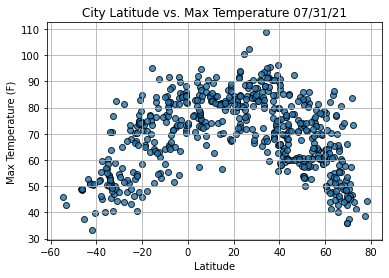

In [18]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

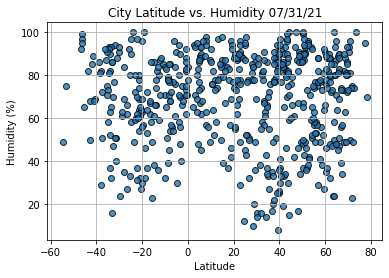

In [19]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

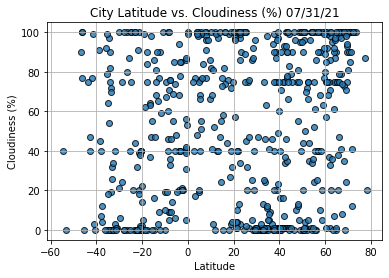

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

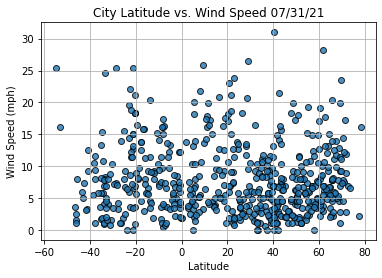

In [21]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [22]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    
    #If we run this code there will be no output until we call the function with five parameters.
    #To get an output from a function, we need to call the function with the correct number of parameters or arguments for the function.

In [23]:
#Create the Hemisphere DataFrames
#We will add some code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres. 
#To do this, we will need to create Northern Hemisphere DataFrames from the city_data_df DataFrame.

#To create a new DataFrame from a current DataFrame, we can use the loc method on the current DataFrame.

index13 = city_data_df.loc[13]
index13

City                         Kyra
Country                        RU
Date          2021-08-01 05:32:39
Lat                       49.5776
Lng                      111.9753
Max Temp                    72.48
Humidity                       49
Cloudiness                     40
Wind Speed                   4.03
Name: 13, dtype: object

In [24]:
# We can also filter a DataFrame based on a value of a row.
#  For instance, if we wanted to get all Northern Hemisphere latitudes, 
# for latitudes greater than or equal to 0, we can filter the city_data_df

city_data_df["Lat"] >= 0

0       True
1       True
2      False
3      False
4      False
       ...  
569     True
570    False
571     True
572    False
573    False
Name: Lat, Length: 574, dtype: bool

In [25]:
# If we want to return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0, 
# we can use the loc method on the city_data_df 
# Inside the brackets, we would add the conditional filter city_data_df["Lat"] >= 0 so that our statement would appear as:

city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

# Now assign this DataFrame to the variable northern_hemi_df to access the data to perform linear regression.
# We can take the same approach to get the cities for the Southern Hemisphere by filtering the city_data_df DataFrame for latitudes less than 0.


,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Cherskiy,RU,2021-08-01 05:24:52,68.7500,161.3000,48.58,63,100,12.77
1,Puerto Escondido,MX,2021-08-01 05:27:12,15.8500,-97.0667,80.92,84,82,5.88
5,Harper,LR,2021-08-01 05:24:47,4.3750,-7.7169,75.97,83,100,10.36
7,Tiksi,RU,2021-08-01 05:25:30,71.6872,128.8694,46.74,75,41,8.97
8,Verkhoyansk,RU,2021-08-01 05:32:37,67.5447,133.3850,73.13,34,8,14.00


In [26]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

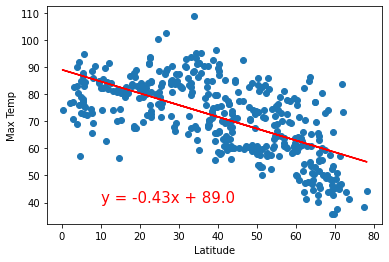

In [27]:
# To generate the linear regression on the maximum temperature for the Northern Hemisphere, we'll need x and y values. 
# Set the x values equal to the latitude column and the y values equal to the maximum temperature column from the 
# northern_hemi_df DataFrame.

# Call the plot_linear_regression function (row 21) with the x and y values, and edit the title, y_label, 
# and text_coordinates for the maximum temperature scatter plot. 
# Add the code to a new cell and run it to generate the linear regression and plot the data.

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

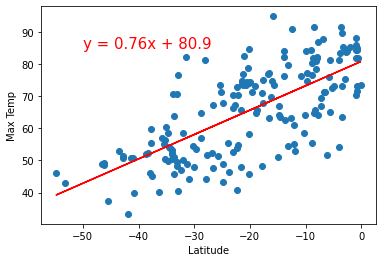

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,85))

In [29]:
## FINDING

# The correlation between the latitude and the maximum temperature is strong to very strong because the r-value is 
# less than –0.7 for the Northern Hemisphere and greater than 0.7 for the Southern Hemisphere, as shown by the plots here. 
# This means that as we approach the equator, 0° latitude, the temperatures become warmer.

# Find the Correlation Between Latitude and Percent Humidity

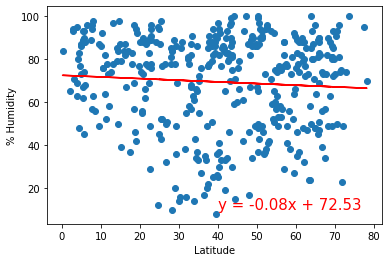

In [30]:
# Linear regression on the Northern Hemisphere 
# --> CALLING THE FUNCTION ON LINE 21 AGAIN!
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

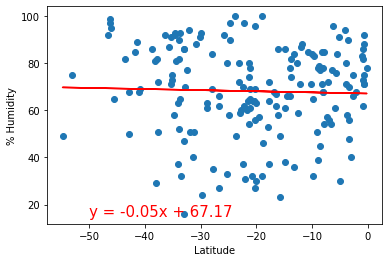

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [32]:
# FINDING
# The correlation between the latitude and percent humidity is very low because the r-value is less than 0.04 for the 
# Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to 
# changing weather patterns that can increase or decrease percent humidity.

In [33]:
# CHECK THE R_VALUE OF THE PLOT

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

-0.03233485863839015


# Find the Correlation Between Latitude and Percent Cloudiness

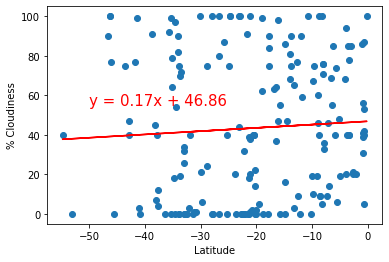

In [34]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,55))

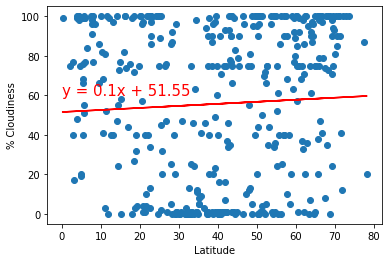

In [35]:
# Linear regression on the Nothern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(0,60))

In [36]:
# FINDING
# The correlation between the latitude and percent cloudiness is very low because the r-value is less than 
# –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. 
# This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent 
# cloudiness. 

In [37]:
# CHECK THE R_VALUE OF THE PLOT

(slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
print(r_value)

0.05275435082558824


# Find the Correlation Between Latitude and Wind Speed

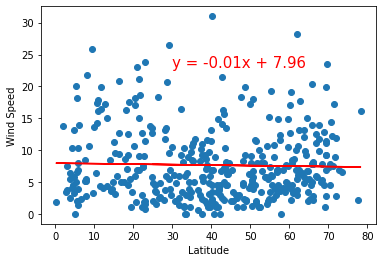

In [38]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(30,23))

In [39]:
# CHECK THE R_VALUE OF THE PLOT

(slope, intercept, r_value, p_value, std_err) = linregress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
print(r_value)

-0.027408883592981218


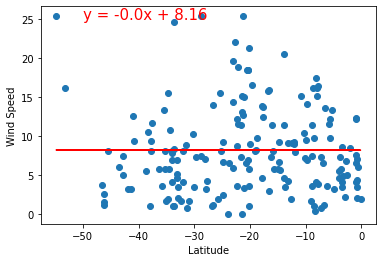

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,25))

In [41]:
# FINDING:
# The correlation between the latitude and wind speed is very low because the r-value is less  than –0.07 for 
# the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here. This means that wind 
# speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. 

In [42]:
# CHECK THE R_VALUE OF THE PLOT

(slope, intercept, r_value, p_value, std_err) = linregress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
print(r_value)
print(p_value) #--> показва каква е вероятността при добавяне на нови данни, моделът да даде грешни данни; колкото по-малко е по-велюто, толкова по-надежден е моделът

-0.0014609218738111198
0.9844711282006104


# GOOGLE API -  see VacationPy

# Get Vacation Criteria

Now, the cherry on top of the project: a feature on the app that allows customers to search for locations they want to travel based on their temperature preferences.

Your clients will enter their preferences. Your code will tell them where to travel. It's beautiful, simple, and just needs a few more lines of code to actually work.

For the app we are creating, we need to prompt the user to enter the minimum and maximum temperature ranges as floating-point decimal numbers to filter the city_data_df DataFrame.

Recall that you use the input() statement to prompt a user to enter information. To convert the input to a floating-point decimal number, wrap the input() statement with the float() method, like this: float(input()).

Filtering  -  Recall that you use the loc[] method on the current DataFrame to create a new DataFrame from a current DataFrame. Inside the brackets, add the conditional filter.

In [46]:
# Ask the customer to add a minimum and maximum temperature value.
min_temp = float(input("What is the minimum temperature you would like for your trip? "))
max_temp = float(input("What is the maximum temperature you would like for your trip? "))

What is the minimum temperature you would like for your trip? 75
What is the maximum temperature you would like for your trip? 90


In [47]:
# Filter the dataset to find the cities that fit the criteria.
preferred_cities_df = city_data_df.loc[(city_data_df["Max Temp"] <= max_temp) & \
                                       (city_data_df["Max Temp"] >= min_temp)]
preferred_cities_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Puerto Escondido,MX,2021-08-01 05:27:12,15.8500,-97.0667,80.92,84,82,5.88
4,Hithadhoo,MV,2021-08-01 05:24:35,-0.6000,73.0833,81.82,71,53,5.99
5,Harper,LR,2021-08-01 05:24:47,4.3750,-7.7169,75.97,83,100,10.36
9,Butaritari,KI,2021-08-01 05:32:38,3.0707,172.7902,82.76,71,17,7.58
10,Atuona,PF,2021-08-01 05:32:38,-9.8000,-139.0333,77.27,65,67,14.09
12,Gushikawa,JP,2021-08-01 05:32:39,26.3544,127.8686,87.39,78,75,18.41
16,Port Blair,IN,2021-08-01 05:26:18,11.6667,92.7500,84.45,78,100,19.89
19,Kapaa,US,2021-08-01 05:32:19,22.0752,-159.3190,84.18,77,40,3.00
24,Labuhan,ID,2021-08-01 05:32:43,-6.8844,112.2051,87.80,56,14,6.51
28,Srivardhan,IN,2021-08-01 05:32:44,18.0333,73.0167,82.83,78,99,16.22


In [48]:
preferred_cities_df.count()

City          192
Country       192
Date          192
Lat           192
Lng           192
Max Temp      192
Humidity      192
Cloudiness    192
Wind Speed    192
dtype: int64

Consider the following guidance:

Depending on the time of year and the seasons, you might have to adjust the minimum and maximum temperature to get enough cities.
It is a good idea to keep the number of cities to fewer than 200 to make it easier to plot the markers on the heatmap.
If you have some rows with null values, you'll need to drop them using the dropna() method at the end of your filtering statement when you are creating the new DataFrame.

# Map Vacation Criteria
Once the customers have filtered the database (DataFrame) based on their temperature preferences, show them a heatmap for the maximum temperature for the filtered cities. In addition, create a marker for each city that will display the name of the city, country code, maximum temperature, and name of a nearby hotel within three miles of the coordinates when the marker is clicked.

Using the coordinates from the preferred_cities_df DataFrame, find a hotel using our Google Places API and then retrieve that hotel information. Once we retrieve the hotel information, we'll need to store it so we can reference it and add the information to the pop-up marker.

# Get Travel Destinations
Don't add the hotel information to the preferred_cities_df DataFrame because this DataFrame is our filtered DataFrame, and the customer will always filter it for each trip. We'll need to create a new DataFrame specifically for the data needed to create a heatmap and pop-up markers.

Make a copy of the preferred_cities_df DataFrame and name it hotel_df. For the hotel_df, keep the columns "City," "Country," "Max Temp," "Lat," and "Lng." Add a new column to the hotel_df DataFrame to hold the name of the hotel.

In [49]:
# Create DataFrame called hotel_df to store hotel names along with city, country, max temp, and coordinates.
hotel_df = preferred_cities_df[["City", "Country", "Max Temp", "Lat", "Lng"]].copy()
hotel_df["Hotel Name"] = ""
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Puerto Escondido,MX,80.92,15.8500,-97.0667,
4,Hithadhoo,MV,81.82,-0.6000,73.0833,
5,Harper,LR,75.97,4.3750,-7.7169,
9,Butaritari,KI,82.76,3.0707,172.7902,
10,Atuona,PF,77.27,-9.8000,-139.0333,
12,Gushikawa,JP,87.39,26.3544,127.8686,
16,Port Blair,IN,84.45,11.6667,92.7500,
19,Kapaa,US,84.18,22.0752,-159.3190,
24,Labuhan,ID,87.80,-6.8844,112.2051,
28,Srivardhan,IN,82.83,18.0333,73.0167,


Using the latitude and longitude and specific parameters, use the Google Places Nearby Search request to retrieve a hotel and add it to the Hotel Name column.

# Retrieve Hotels from a Nearby Search

The Nearby Search request lets us perform these tasks:

Search for places within a specified area.
Refine the search using keywords and specifying the type of place we are searching for.
Use an API URL, where the output can be either XML or JSON format.
Although very similar to our OpenWeatherMap API search, with the Google Places Nearby Search, we'll add a specified area and keyword to search.

The documentation states we must provide specific parameters.

https://developers.google.com/maps/documentation/places/web-service/search#PlaceSearchRequests%0D%0A

Specific parameters include:

Our API key
A location, which will be the latitude and longitude
A radius for the search. The radius can be up to 50,000 meters or approximately 31 miles. This distance is much too great for finding hotels, so we'll keep our search to 5,000 meters.
If we use the rankby=distance for a parameter, we need to add one or more of the three parameters above. We won't use the rankby=distance because we will be search based on the radius from a given latitude and longitude.

We can add optional parameters such as a keyword, a type of business, or the name of a business.

For our hotel search, we'll use these parameters:

API key
Latitude and longitude
5,000-meter radius
Type of place


Recall that when we made a request with the OpenWeatherMap API, we added the base URL with the city, city_url, to the request, city_weather = requests.get(city_url).

We can use the same format to make a request with the Google Places API. The following base URL is provided to retrieve the JSON format of the data:

https://maps.googleapis.com/maps/api/place/nearbysearch/json

In [52]:
# Set parameters to search for a hotel. the radius is in meters
params = {
    "radius": 5000,
    "type": "lodging",
    "key": g_key
}

In [55]:
# SEE Google_Nearby_Search.IPYNB --> HERE WE CHECKED HOW THE JSON RESPONSE LOOKS LIKE FOR AN EXAMPLE DESTINATYION

# We can use the iterrows() function to perform the iteration; however, 
# we need to provide the index and the row in the for loop using this syntax: for index, row in df.iterrows().

# Recall that when trying to parse the data from an API request, we need to use a try-except block to handle the error 
# with a statement and continue the retrieval.

# Iterate through the DataFrame.
for index, row in hotel_df.iterrows():
    # Get the latitude and longitude.
    lat = row["Lat"]
    lng = row["Lng"]

    # Add the latitude and longitude to location key for the params dictionary.
    params["location"] = f"{lat},{lng}"

    # Use the search term: "lodging" and our latitude and longitude.
    base_url = "https://maps.googleapis.com/maps/api/place/nearbysearch/json"
    # Make request and get the JSON data from the search.
    hotels = requests.get(base_url, params=params).json()
    # Grab the first hotel from the results and store the name.
    try:
        hotel_df.loc[index, "Hotel Name"] = hotels["results"][0]["name"]
    except (IndexError):
        print("Hotel not found... skipping.")
        
        #If you encounter more errors, add them to the except block—like so, (IndexError, NewError)—and continue running your code until there are no errors.

Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.
Hotel not found... skipping.


In [56]:
hotel_df.head(10)

,City,Country,Max Temp,Lat,Lng,Hotel Name
1,Puerto Escondido,MX,80.92,15.8500,-97.0667,Aldea del Bazar Hotel and Spa
4,Hithadhoo,MV,81.82,-0.6000,73.0833,Scoop Guest House
5,Harper,LR,75.97,4.3750,-7.7169,Screensaver
9,Butaritari,KI,82.76,3.0707,172.7902,Isles Sunset Lodge
10,Atuona,PF,77.27,-9.8000,-139.0333,Villa Enata
12,Gushikawa,JP,87.39,26.3544,127.8686,Kirari Guest House
16,Port Blair,IN,84.45,11.6667,92.7500,"Welcomhotel By ITC Hotels, Bay Island, Port Blair"
19,Kapaa,US,84.18,22.0752,-159.3190,Sheraton Kauai Coconut Beach Resort
24,Labuhan,ID,87.80,-6.8844,112.2051,PT PPI Lamongan Tambak C
28,Srivardhan,IN,82.83,18.0333,73.0167,Savli Resort/Hotel - Shrivardhan


Our final task will be to add pop-up markers with hotel information to a heatmap.
Before we add pop-up markers with hotel information, let's create a heatmap using the maximum temperature from our hotel_df DataFrame by reusing the code and changing the DataFrame name.

# Create a Maximum Temperature Heatmap from a Hotel DataFrame

In [60]:
# Add a heatmap of temperature for the vacation spots and marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,
             dissipating=False, max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)
# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))

In [63]:
info_box_template = """
<dl>
<dt>Hotel Name</dt><dd>{Hotel Name}</dd>
<dt>City</dt><dd>{City}</dd>
<dt>Country</dt><dd>{Country}</dd>
<dt>Max Temp</dt><dd>{Max Temp} °F</dd>
</dl>
"""

Here's what these tags mean:

The <dl> tag is a description list (dl).
The <dt> tag is a term or name in a description list that is nested under the <dl> tag.
The <dd> tag is used to define the term or name or <dt> tag.
If we were to write out these tags on paper, it would look like this.

Description List: <dl>
Description Term: <dt>
Description Definition: <dd>
Description Term: <dt>
Description Definition: <dd>

In [65]:
# Store the DataFrame Row.
hotel_info = [info_box_template.format(**row) for index, row in hotel_df.iterrows()]

Let's review what we're doing with this code.

We set the hotel_info equal to the info_box_content.
In the list comprehension, info_box_template.format(**row) for index, row in hotel_df.iterrows(), we iterate through each "row" of the hotel_df DataFrame and then format the info_box_template with the data we set to populate the from each row. Remember, we are not using every row; we are only using the rows defined in the info_box_template, which are Hotel Name, City, Country, and Max Temp.

In [66]:
# Add a heatmap of temperature for the vacation spots and a pop-up marker for each city.
locations = hotel_df[["Lat", "Lng"]]
max_temp = hotel_df["Max Temp"]
fig = gmaps.figure(center=(30.0, 31.0), zoom_level=1.5)
heat_layer = gmaps.heatmap_layer(locations, weights=max_temp,dissipating=False,
             max_intensity=300, point_radius=4)
marker_layer = gmaps.marker_layer(locations, info_box_content=hotel_info)
fig.add_layer(heat_layer)
fig.add_layer(marker_layer)

# Call the figure to plot the data.
fig

Figure(layout=FigureLayout(height='420px'))